# Human Protein Atlas - Single Cell Classification

In [10]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
train_csv = pd.read_csv('/home/chad/Kaggle Data/Protein_Atlas/train.csv')

In [3]:
train_csv.head()

,ID,Label
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10
4,5b931256-bb99-11e8-b2b9-ac1f6b6435d0,14|0


### Build the label map

In [8]:
label_map = {
    0: 'Nucleoplasm',
    1: 'Nuclear membrane',
    2: 'Nucleoli',
    3: 'Nucleoli fibrillar center',
    4: 'Nuclear speckles',
    5: 'Nuclear bodies',
    6: 'Endoplasmic reticulum',
    7: 'Golgi apparatus',
    8: 'Intermediate filaments',
    9: 'Actin filaments',
    10: 'Microtubules',
    11: 'Mitotic spindle',
    12: 'Centrosome',
    13: 'Plasma membrane',
    14: 'Mitochondria',
    15: 'Aggresome',
    16: 'Cytosol',
    17: 'Vesicles and punctate cytosolic patterns',
    18: 'Negative'}

### Import first four files to create the full cell image

Text(0.5, 1.0, 'Yellow - Endoplasmic Reticulum (ER) Channels')

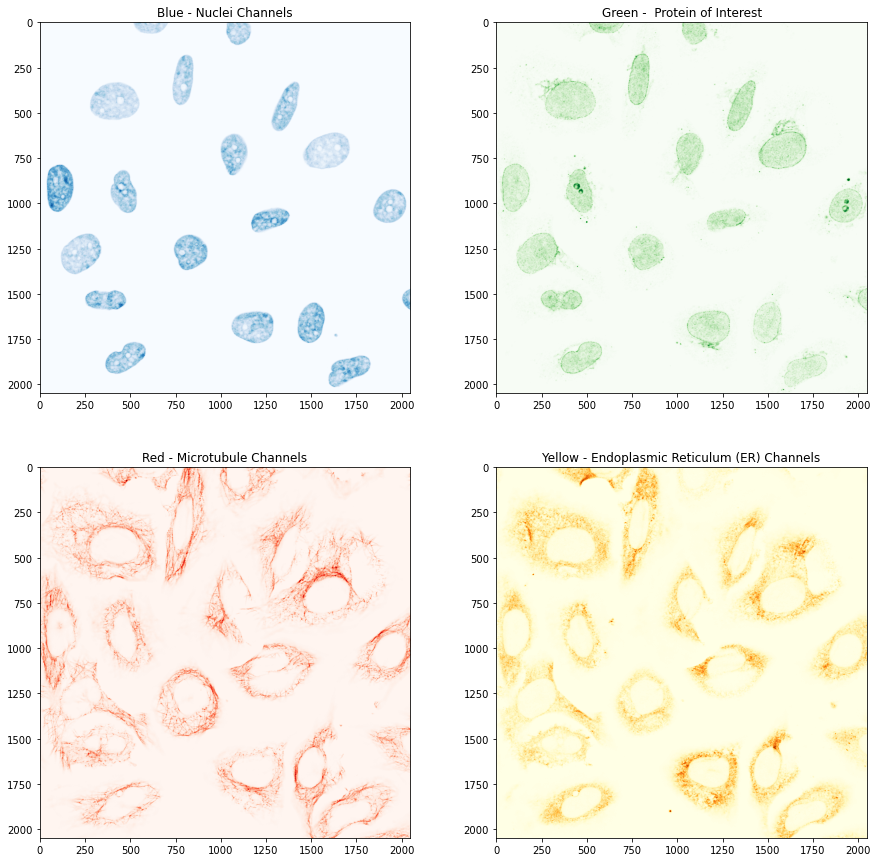

In [28]:
imgBlue = mpimg.imread('/home/chad/Kaggle Data/Protein_Atlas/train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_blue.png')
imgGreen = mpimg.imread('/home/chad/Kaggle Data/Protein_Atlas/train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png')
imgRed = mpimg.imread('/home/chad/Kaggle Data/Protein_Atlas/train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_red.png')
imgYellow = mpimg.imread('/home/chad/Kaggle Data/Protein_Atlas/train/000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_yellow.png')


fig, axs = plt.subplots(2,2, figsize=(15,15))
axs[0,0].imshow(imgBlue, cmap='Blues')
axs[0,0].set_title("Blue - Nuclei Channels")
axs[0,1].imshow(imgGreen, cmap='Greens')
axs[0,1].set_title("Green -  Protein of Interest")
axs[1,0].imshow(imgRed, cmap='Reds')
axs[1,0].set_title("Red - Microtubule Channels")
axs[1,1].imshow(imgYellow, cmap='YlOrBr')
axs[1,1].set_title("Yellow - Endoplasmic Reticulum (ER) Channels")